# Introduction to AI: Machine Learning for Business - Final project

## Context

Congratulations, you’ve just been hired as an AI expert at a company.

For this final project you are required to choose and define a business problem of which you will apply machine learning to. 
Your final submission should include the following: 

- Problem definition
- Data Collection
- Data Processing
- Model Selection
- Results Visualization
- Results Interpretation

## Your dataset

The group should select a real life dataset. Finding an appropriate dataset is part of the game and will determine the quality of your work. It requires spending a significant amount of time doing research.

The selected dataset should contain at least 15 columns and at least 30000 rows.

## What should you do ?

Make a notebook telling interesting things about the data you have fetched, tell a story (or many) using everything you learned. Build predictive models and compare them.  
You have to submit at least a notebook and any resources you used (like images or any other files).

## Assessment 
Here are the criteria we will use to assess your work:

### Is it meaningful?
As a machine learning expert you have to produce something meaningful enough, just plotting random data is not going to work. Like a story your analysis should have some kind of logical progression.

### How well did you use the technical knowledge you’ve been taught?
Obviously, the way you use everything you learned during the lectures is going to be assessed.

### Cleanliness, aesthetics and clarity of your notebook
Is your analysis full of unused code? Is it difficult to read? Have you tried to make it easy and enjoyable to read?

### Innovation
Creativity, surprising things or any good initiatives you take are potential bonus points.


### `Careful:`
**`This work is individual, plagiarism is going to be measured by both machines and humans. Too many similarities between your work and any online or python buddy work will result in grade penalties.`**


**Good Luck!**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_roc_curve

pd.set_option('display.max_columns',None)

## 1. Problem definition

- Banks earn a major revenue from lending loans. But it is often associated with risk. The borrower's may default on the loan. To mitigate this issue, the banks have decided to use Machine Learning to overcome this issue. They have collected past data on the loan borrowers and we would like to develop a strong ML Model to classify if any new borrower is likely to default or not.
- The dataset is enormous & consists of multiple deteministic factors like borrowe's income, gender, loan pupose etc. The dataset is subject to strong multicollinearity & empty values. We are supposed to overcome these factors & build a strong classifier to predict defaulters?

## 2. Data Collection

In [2]:
# from https://www.kaggle.com/yasserh/loan-default-dataset
data = pd.read_csv("Loan_Default.csv")
data

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.560,0.2000,595.00,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.250,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.000,0.3042,0.00,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,436500,3.125,0.2571,9960.00,180.0,not_neg,not_int,not_lpsm,608000.0,sb,pr,home,1U,7860.0,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,586500,5.190,0.8544,0.00,360.0,not_neg,not_int,not_lpsm,788000.0,sb,ir,home,4U,7140.0,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,446500,3.125,0.0816,1226.64,180.0,not_neg,not_int,not_lpsm,728000.0,sb,pr,home,1U,6900.0,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,196500,3.500,0.5824,4323.33,180.0,not_neg,not_int,not_lpsm,278000.0,sb,pr,home,1U,7140.0,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


## 3. Data Processing

In [3]:
data[data["Status"] == 1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36639 entries, 0 to 148663
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         36639 non-null  int64  
 1   year                       36639 non-null  int64  
 2   loan_limit                 35758 non-null  object 
 3   Gender                     36639 non-null  object 
 4   approv_in_adv              36398 non-null  object 
 5   loan_type                  36639 non-null  object 
 6   loan_purpose               36604 non-null  object 
 7   Credit_Worthiness          36639 non-null  object 
 8   open_credit                36639 non-null  object 
 9   business_or_commercial     36639 non-null  object 
 10  loan_amount                36639 non-null  int64  
 11  rate_of_interest           200 non-null    float64
 12  Interest_rate_spread       0 non-null      float64
 13  Upfront_charges            153 non-null    fl

In [4]:
# drop the columns with too much null values in Status == 1
data = data.drop(["rate_of_interest", "Interest_rate_spread", "Upfront_charges", "property_value", "LTV", "dtir1"], axis=1)

# drop the useless columns.
data = data.drop(["ID", "year"], axis=1)

# drop the lines with null values.
data = data.dropna(axis=0, how="any")

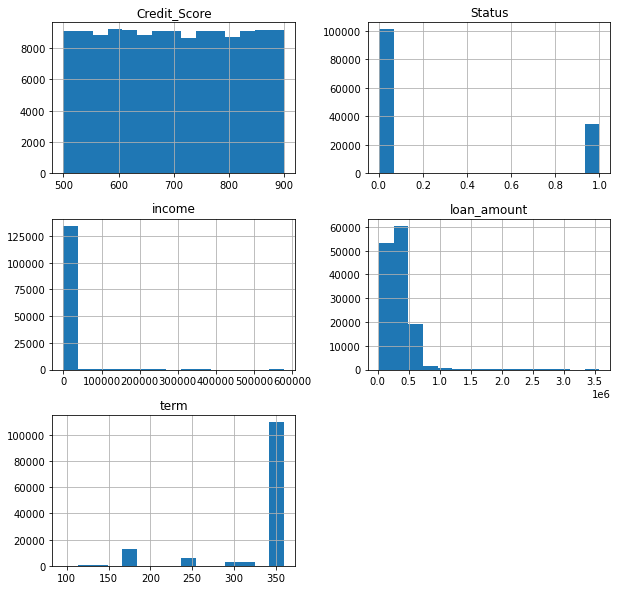

In [5]:
# check the distribution of numeric columns.
data.hist(bins=15, figsize=(10,10))
plt.show()

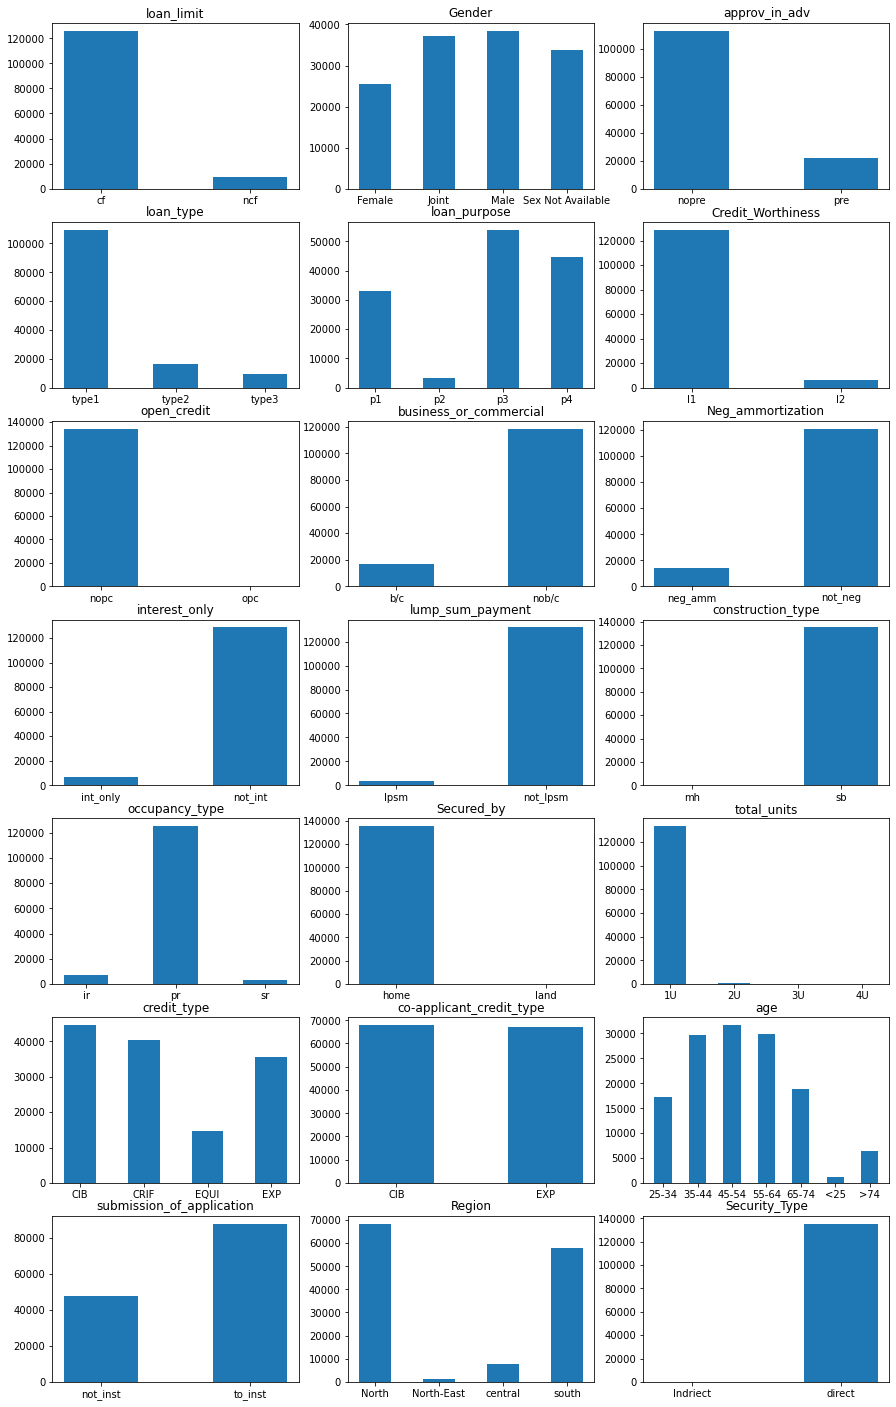

In [6]:
# check the distribution of non-numeric columns.
object_list = list(data.columns[data.dtypes == "object"])
fig = plt.figure(figsize=(15,25))
n = 1
for column in object_list:
    d = pd.DataFrame(data.loc[:, [column, "Status"]]).groupby(column).count()["Status"]
    ax = fig.add_subplot(7, 3, n)
    ax.bar(height=d, x=[i for i in range(len(d))], width = 0.5)
    ax.set_xticks([i for i in range(len(d))])
    ax.set_xticklabels(list(d.index))
    ax.set_title(column)
    n +=1
plt.show()

In [7]:
# drop the columns with extreme distributions, which are useless for predicting.
data = data.drop(["Security_Type", "total_units", "construction_type", "open_credit", "Secured_by", "income"], axis=1)

In [8]:
# change the object columns into one-hot coding.
dummy_list = list(data.columns[data.dtypes == "object"])
for i in dummy_list:
    data = pd.concat([data, pd.get_dummies(data[i]).iloc[:, 1:]], axis=1)
    data.drop(i, axis=1, inplace=True)

In [9]:
# check the information of the data again.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135108 entries, 0 to 148669
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   loan_amount        135108 non-null  int64  
 1   term               135108 non-null  float64
 2   Credit_Score       135108 non-null  int64  
 3   Status             135108 non-null  int64  
 4   ncf                135108 non-null  uint8  
 5   Joint              135108 non-null  uint8  
 6   Male               135108 non-null  uint8  
 7   Sex Not Available  135108 non-null  uint8  
 8   pre                135108 non-null  uint8  
 9   type2              135108 non-null  uint8  
 10  type3              135108 non-null  uint8  
 11  p2                 135108 non-null  uint8  
 12  p3                 135108 non-null  uint8  
 13  p4                 135108 non-null  uint8  
 14  l2                 135108 non-null  uint8  
 15  nob/c              135108 non-null  uint8  
 16  no

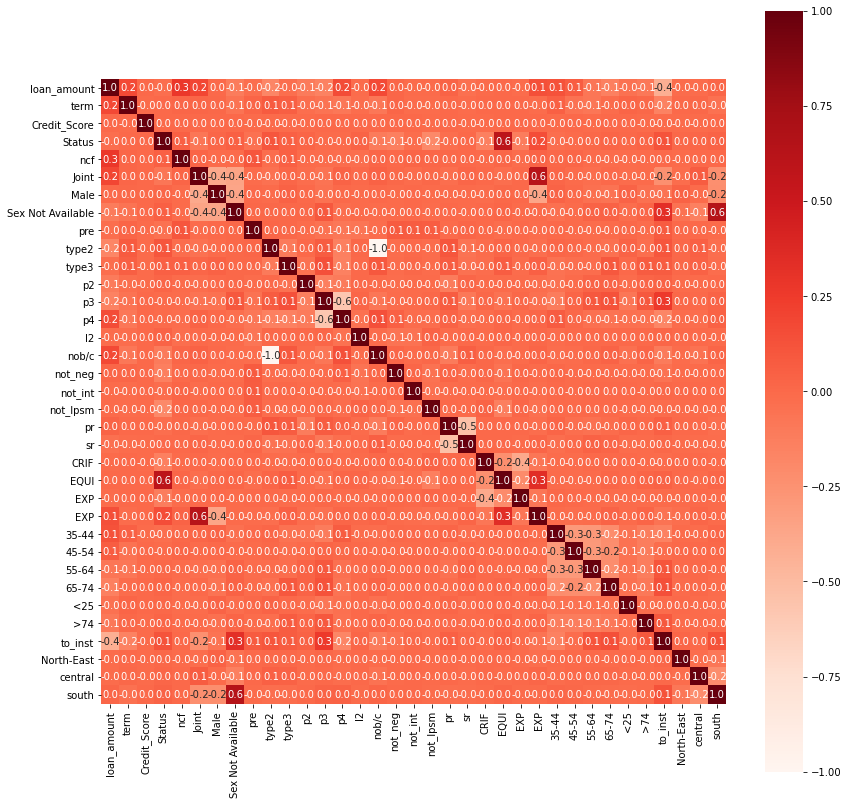

In [10]:
# find the correlation between columns.
corr = data.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, cmap='Reds',square=True, fmt=".1f") 
plt.show()

In [11]:
# drop the columns with coreelations that are too high.
data = data.drop(["type2"], axis=1)

In [12]:
# Reselect data to make the it balance. 
status_1 = data[data["Status"] == 1]
status_0 = data[data["Status"] == 0].sample(len(status_1) * 2)
data = pd.concat([status_0, status_1, status_1], axis=0)
data = data.sample(frac=1)

In [13]:
# split the dataset into train set and test set.
X = data.drop("Status", axis=1)
y = data["Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [14]:
# scaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# PCA principal component analysis
pca = PCA(n_components=10)
pca.fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

## 4. Model Selection

score for the training set : 0.9998625087006213
score for the training set : 0.8661927253250231
              precision    recall  f1-score   support

           0       0.94      0.78      0.85     10208
           1       0.82      0.95      0.88     10329

    accuracy                           0.87     20537
   macro avg       0.88      0.87      0.87     20537
weighted avg       0.88      0.87      0.87     20537



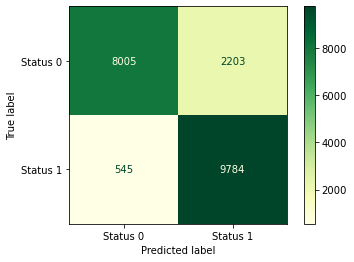

In [16]:
# Decision tree
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
predict_test = DT.predict(X_test)

print("score for the training set :", DT.score(X_train, y_train))
print("score for the training set :", DT.score(X_test, y_test))

print(classification_report(y_test, predict_test))

labels = ["Status 0", "Status 1"]
M = confusion_matrix(y_test, predict_test)
disp = ConfusionMatrixDisplay(confusion_matrix=M, display_labels=labels)
disp.plot(cmap=plt.cm.YlGn) 
plt.show()

score for the training set : 0.6875510221618788
score for the training set : 0.6855431659930856
              precision    recall  f1-score   support

           0       0.66      0.76      0.71     10208
           1       0.72      0.61      0.66     10329

    accuracy                           0.69     20537
   macro avg       0.69      0.69      0.68     20537
weighted avg       0.69      0.69      0.68     20537



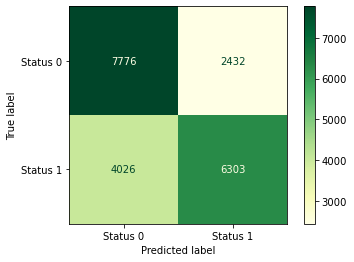

In [17]:
# Logistic regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
predict_test = lr.predict(X_test)

print("score for the training set :", lr.score(X_train, y_train))
print("score for the training set :", lr.score(X_test, y_test))

print(classification_report(y_test, predict_test))

labels = ["Status 0", "Status 1"]
M = confusion_matrix(y_test, predict_test)
disp = ConfusionMatrixDisplay(confusion_matrix=M, display_labels=labels)
disp.plot(cmap=plt.cm.YlGn)
plt.show()

score for the training set : 0.7355440788512602
score for the training set : 0.742026586161562
              precision    recall  f1-score   support

           0       0.68      0.93      0.78     10208
           1       0.88      0.56      0.69     10329

    accuracy                           0.74     20537
   macro avg       0.78      0.74      0.73     20537
weighted avg       0.78      0.74      0.73     20537



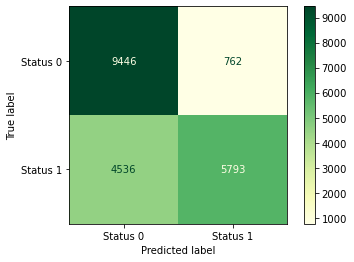

In [18]:
# network
model = MLPClassifier(hidden_layer_sizes=(20,20),learning_rate_init=0.1)
model.fit(X_train, y_train)
predict_test = model.predict(X_test)

print("score for the training set :", model.score(X_train, y_train))
print("score for the training set :", model.score(X_test, y_test))

print(classification_report(y_test, predict_test))

labels = ["Status 0", "Status 1"]
M = confusion_matrix(y_test, predict_test)
disp = ConfusionMatrixDisplay(confusion_matrix=M, display_labels=labels)
disp.plot(cmap=plt.cm.YlGn) 
plt.show()

* Through the comparation between the results of different models, we choose to use decision tree in this problem. 
* And to have better result, we try to get better hyperparameters in the following code.

In [19]:
params = {'max_depth': list(range(40, 180, 10))}

grid_search_cv = GridSearchCV(DecisionTreeClassifier(), 
                              params, 
                              verbose=1, 
                              cv=3,
                              n_jobs = -1,)
grid_search_cv.fit(X_train, y_train)

DT = grid_search_cv.best_estimator_
predict_test = DT.predict(X_test)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:   13.8s finished


## 5. Results Visualization

score for the training set : 0.9998625087006213
score for the training set : 0.8655597214783074
              precision    recall  f1-score   support

           0       0.94      0.78      0.85     10208
           1       0.82      0.95      0.88     10329

    accuracy                           0.87     20537
   macro avg       0.88      0.87      0.86     20537
weighted avg       0.88      0.87      0.86     20537



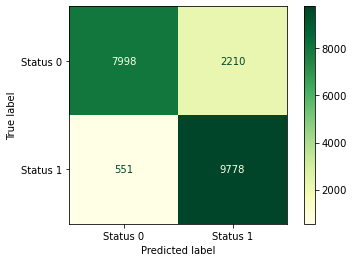

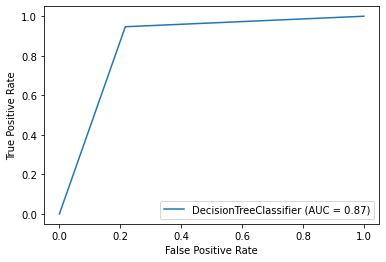

In [20]:
print("score for the training set :", DT.score(X_train, y_train))
print("score for the training set :", DT.score(X_test, y_test))
print(classification_report(y_test, predict_test))

labels = ["Status 0", "Status 1"]
M = confusion_matrix(y_test, predict_test)
disp = ConfusionMatrixDisplay(confusion_matrix=M, display_labels=labels)
disp.plot(cmap=plt.cm.YlGn) 
plot_roc_curve(DT, X_test, y_test)
plt.show()

## 6. Results Interpretation

* The accuracy on the test set is 0.86556, which is the highest among these models.
* f1 score is 0.87, which means the performance of the model is balance.
* AUC = 0.87, which means the performance of the model is good.
* What's more, for banks, it is more important to reduce risk, which means the recall of status=1 should as high as possible and this model achieves this target.